# Import Necessary Library

In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')


modules loaded


In [2]:
pip install tensorflow==2.15.0


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install "numpy<2.0" --force-reinstall


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 146.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/61.0 kB 146.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/61.0 kB 140.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 163.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 163.8 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 163.8 kB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [ ]:
pip install -U numpy pandas pyarrow opencv-python


In [1]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 460.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.1/39.0 MB 825.8 kB/s eta 0:00:48
   ---------------------------------------- 0.1/39.0 MB 655.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/39.0 MB 774.0 kB/s eta 0:00:51
   ---------------------------------------- 0.2/39.0 MB 748.1 kB/s eta 0:00:52
   ---------------------------------------- 0.2/39.0 MB 811.5 kB/s eta 0:00:48
   ---------------------------------------- 0.3/39.0 MB 874.6 kB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.2.6 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.2.6 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.6 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.6 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.6 which is inc

# Reading the Data

In [2]:
data_dir = 'C:/Users/tanis/Downloads/archive (5)/bloodcells_dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    if fold in ['ig', 'neutrophil']:
        continue
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

# Explore the Data

In [3]:
df.head()

,filepaths,labels
0,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
1,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
2,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
3,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
4,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil


In [4]:
df.shape

(10868, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  10868 non-null  object
 1   labels     10868 non-null  object
dtypes: object(2)
memory usage: 169.9+ KB


# Visualization

In [6]:
labelscount = df['labels'].value_counts().reset_index()
labelscount

,labels,count
0,eosinophil,3117
1,platelet,2348
2,erythroblast,1551
3,monocyte,1420
4,basophil,1218
5,lymphocyte,1214


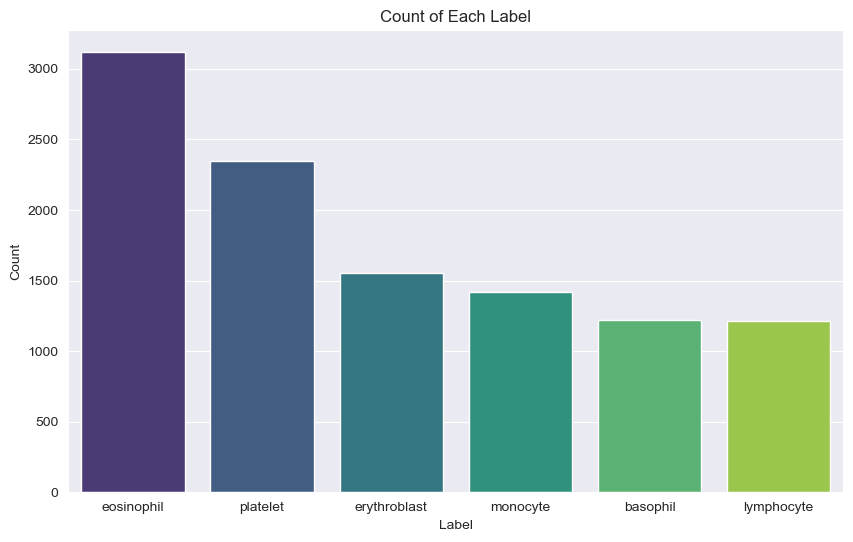

In [7]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='labels', y='count', data=labelscount, palette='viridis')

# Add title and labels
plt.title('Count of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

# Preprocessing

In [8]:
df

,filepaths,labels
0,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
1,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
2,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
3,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
4,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
...,...,...
10863,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet
10864,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet
10865,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet
10866,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet


<h2>Train Test Valid Split<h2>

In [9]:
# train dataframe
train_df, dummy_df = train_test_split(df,  test_size= 0.2, shuffle= True, random_state= 43)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 43)

In [10]:
train_df

,filepaths,labels
7570,C:/Users/tanis/Downloads/archive (5)/bloodcell...,monocyte
4948,C:/Users/tanis/Downloads/archive (5)/bloodcell...,erythroblast
6175,C:/Users/tanis/Downloads/archive (5)/bloodcell...,lymphocyte
6560,C:/Users/tanis/Downloads/archive (5)/bloodcell...,lymphocyte
745,C:/Users/tanis/Downloads/archive (5)/bloodcell...,basophil
...,...,...
2064,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil
10517,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet
7985,C:/Users/tanis/Downloads/archive (5)/bloodcell...,monocyte
2303,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil


In [11]:
dummy_df

,filepaths,labels
2052,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil
8443,C:/Users/tanis/Downloads/archive (5)/bloodcell...,monocyte
1805,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil
7883,C:/Users/tanis/Downloads/archive (5)/bloodcell...,monocyte
3709,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil
...,...,...
6650,C:/Users/tanis/Downloads/archive (5)/bloodcell...,lymphocyte
7653,C:/Users/tanis/Downloads/archive (5)/bloodcell...,monocyte
1275,C:/Users/tanis/Downloads/archive (5)/bloodcell...,eosinophil
10413,C:/Users/tanis/Downloads/archive (5)/bloodcell...,platelet


In [12]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 8694 validated image filenames belonging to 6 classes.
Found 1087 validated image filenames belonging to 6 classes.
Found 1087 validated image filenames belonging to 6 classes.


**Show some pics from Data**

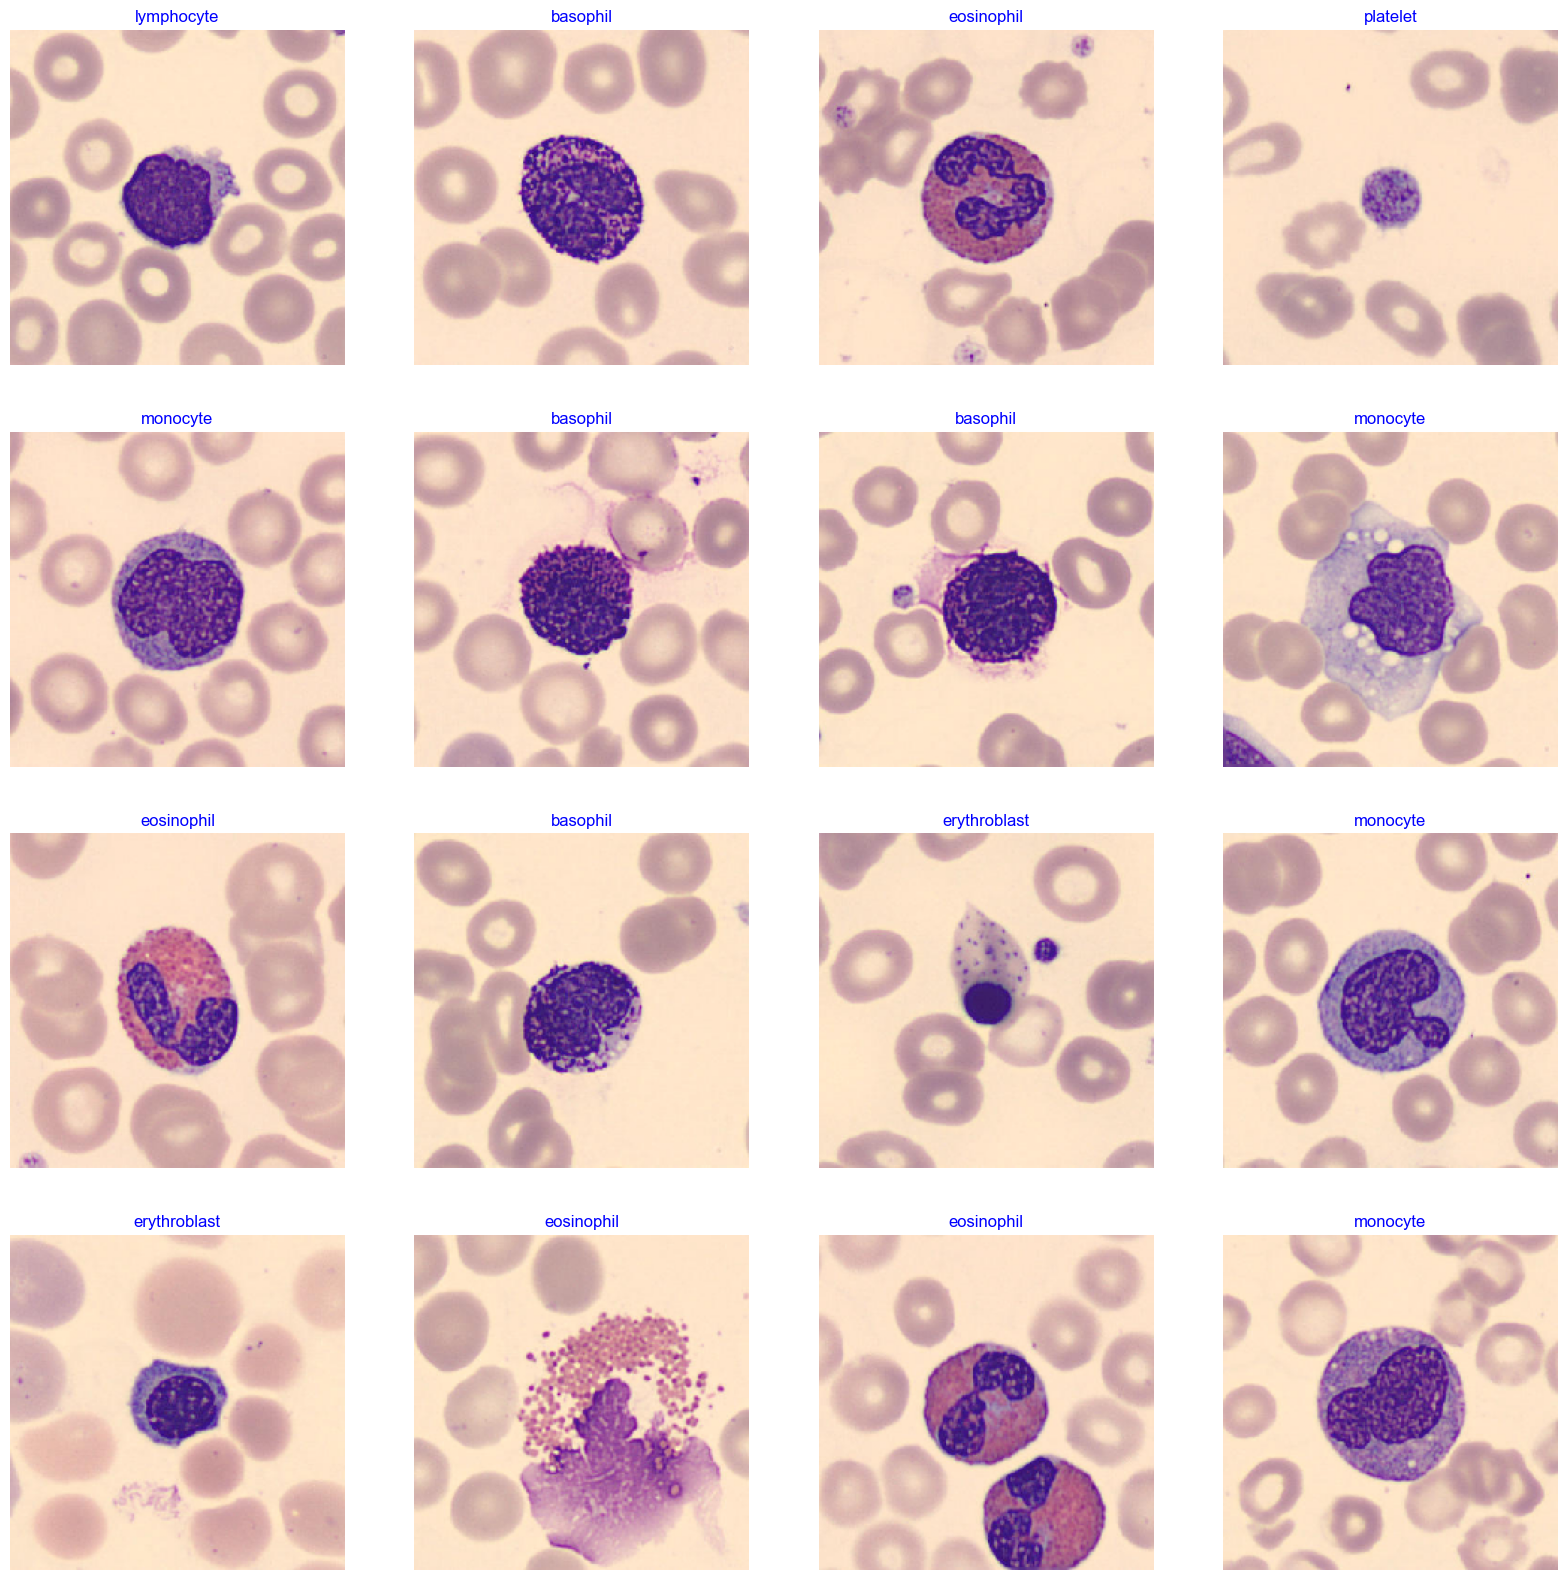

In [13]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Build The Model CNN

In [14]:
class_count = len(train_gen.class_indices)  # you can simplify this line

model = Sequential([
    tf.keras.Input(shape=(img_size[0], img_size[1], channels)),
    tf.keras.layers.Rescaling(1./255),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(class_count, activation='softmax')
])

model.compile(
    optimizer=Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       7

In [16]:
history = model.fit(train_gen, epochs= 5, verbose= 1, validation_data= valid_gen, shuffle = False)

Epoch 1/5


544/544 [==============================] - 330s 598ms/step - loss: 0.7304 - accuracy: 0.7326 - val_loss: 0.4567 - val_accuracy: 0.8381
Epoch 2/5
544/544 [==============================] - 316s 580ms/step - loss: 0.2609 - accuracy: 0.9133 - val_loss: 0.1830 - val_accuracy: 0.9448
Epoch 3/5
544/544 [==============================] - 322s 592ms/step - loss: 0.1541 - accuracy: 0.9513 - val_loss: 0.1293 - val_accuracy: 0.9549
Epoch 4/5
544/544 [==============================] - 548s 1s/step - loss: 0.1040 - accuracy: 0.9658 - val_loss: 0.1291 - val_accuracy: 0.9568
Epoch 5/5
544/544 [==============================] - 336s 618ms/step - loss: 0.0827 - accuracy: 0.9726 - val_loss: 0.0978 - val_accuracy: 0.9733


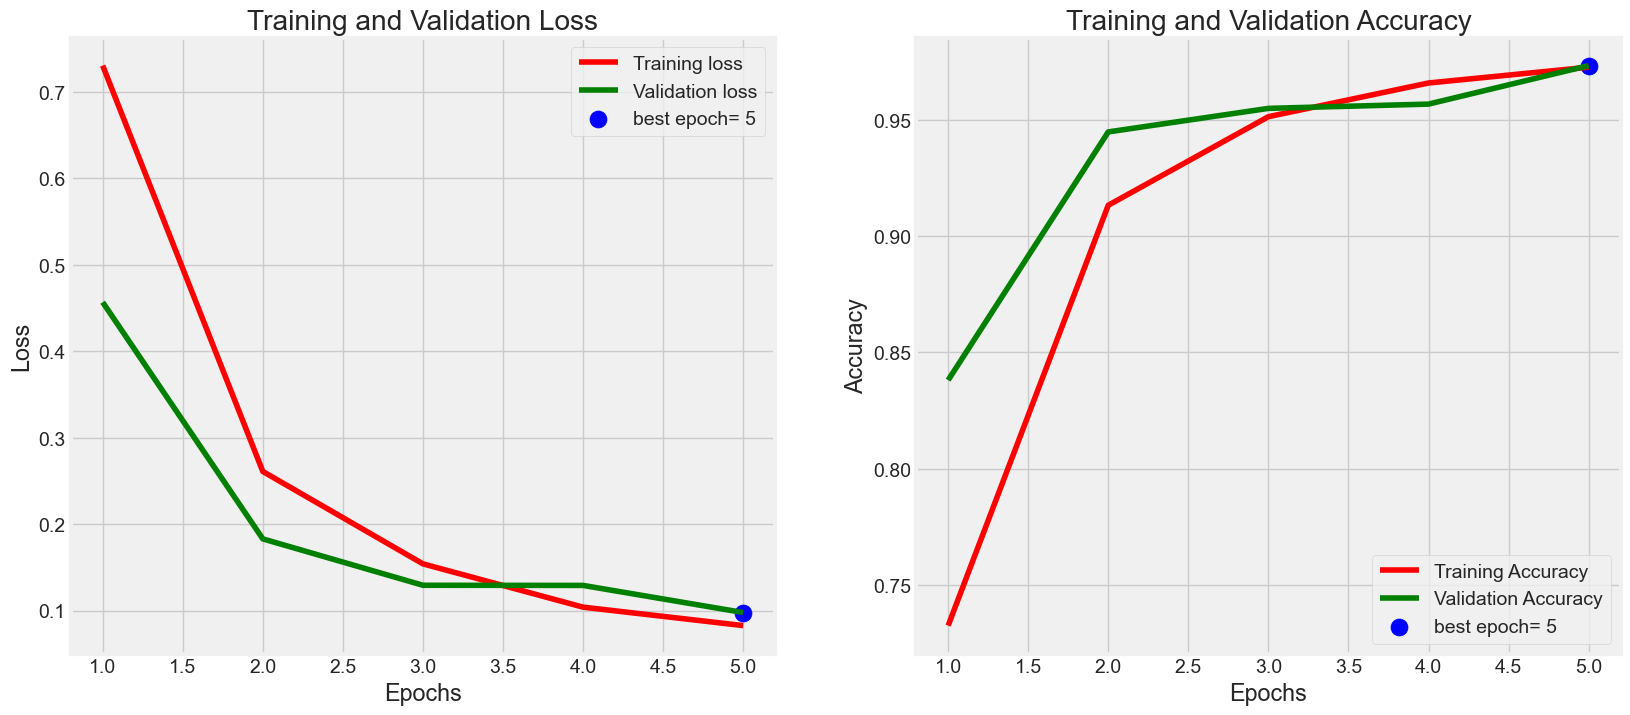

In [17]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [18]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1087/1087 [==============================] - 31s 28ms/step - loss: 0.0886 - accuracy: 0.9733
Train Loss:  0.06061301380395889
Train Accuracy:  0.9827467203140259
--------------------
Validation Loss:  0.09780101478099823
Validation Accuracy:  0.9733210802078247
--------------------
Test Loss:  0.08863196521997452
Test Accuracy:  0.9733210802078247


<h2>Get Predictions<h2>

In [19]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

68/68 [==============================] - 12s 154ms/step


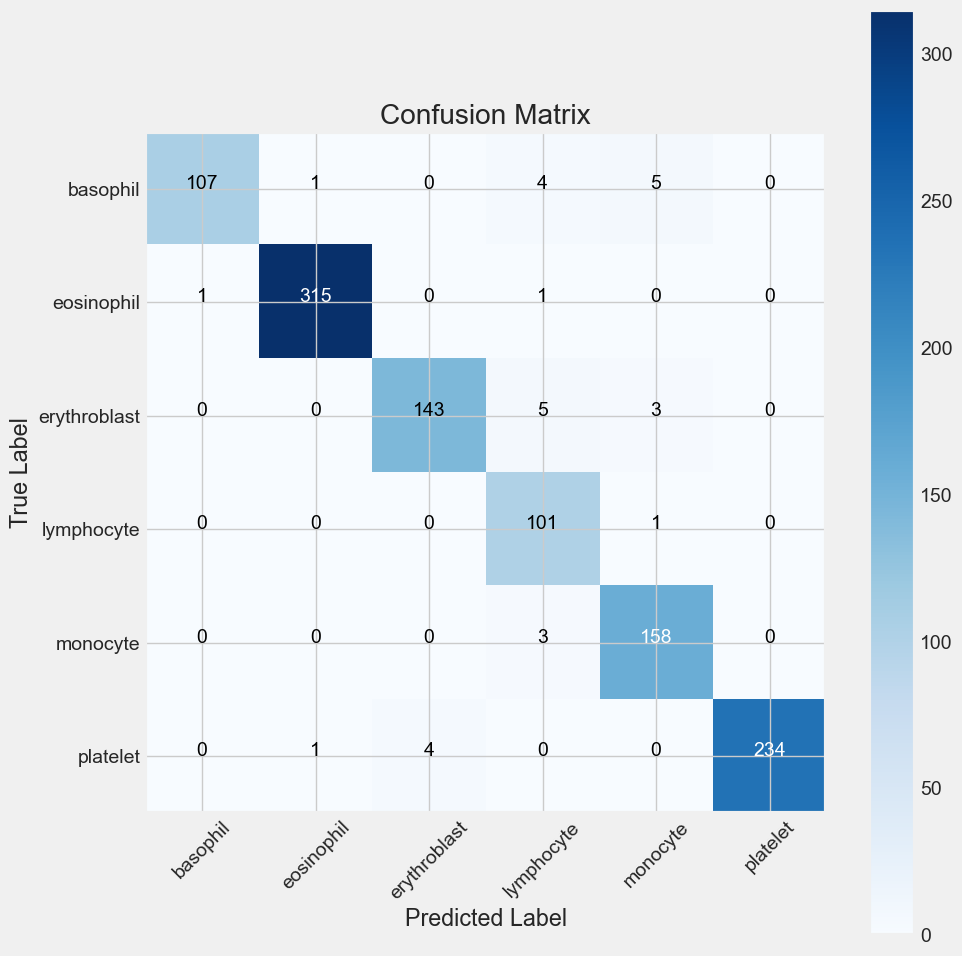

In [20]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [21]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

    basophil       0.99      0.91      0.95       117
  eosinophil       0.99      0.99      0.99       317
erythroblast       0.97      0.95      0.96       151
  lymphocyte       0.89      0.99      0.94       102
    monocyte       0.95      0.98      0.96       161
    platelet       1.00      0.98      0.99       239

    accuracy                           0.97      1087
   macro avg       0.96      0.97      0.97      1087
weighted avg       0.97      0.97      0.97      1087



# Pre Trained Model Using EfficientNetB3

In [22]:

img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can build on pretrained model such as : efficientnet, VGG, Resnet)
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
# base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()


In [23]:
model.build(input_shape=(None, *img_shape))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               393472    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 11184693 (42.67 MB)
Trainable params: 11

In [24]:
history = model.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False) 

Epoch 1/10
544/544 [==============================] - 23088s 42s/step - loss: 5.0636 - accuracy: 0.9370 - val_loss: 2.8707 - val_accuracy: 0.9853
Epoch 2/10
544/544 [==============================] - 4164s 8s/step - loss: 1.8724 - accuracy: 0.9846 - val_loss: 1.1121 - val_accuracy: 0.9816
Epoch 3/10
544/544 [==============================] - 2195s 4s/step - loss: 0.7667 - accuracy: 0.9929 - val_loss: 0.5619 - val_accuracy: 0.9660
Epoch 4/10
544/544 [==============================] - 3041s 6s/step - loss: 0.3768 - accuracy: 0.9942 - val_loss: 0.2849 - val_accuracy: 0.9834
Epoch 5/10
544/544 [==============================] - 2002s 4s/step - loss: 0.2477 - accuracy: 0.9932 - val_loss: 0.2042 - val_accuracy: 0.9899
Epoch 6/10
544/544 [==============================] - 2039s 4s/step - loss: 0.1924 - accuracy: 0.9960 - val_loss: 0.1801 - val_accuracy: 0.9862
Epoch 7/10
544/544 [==============================] - 2032s 4s/step - loss: 0.1675 - accuracy: 0.9965 - val_loss: 0.1530 - val_accurac

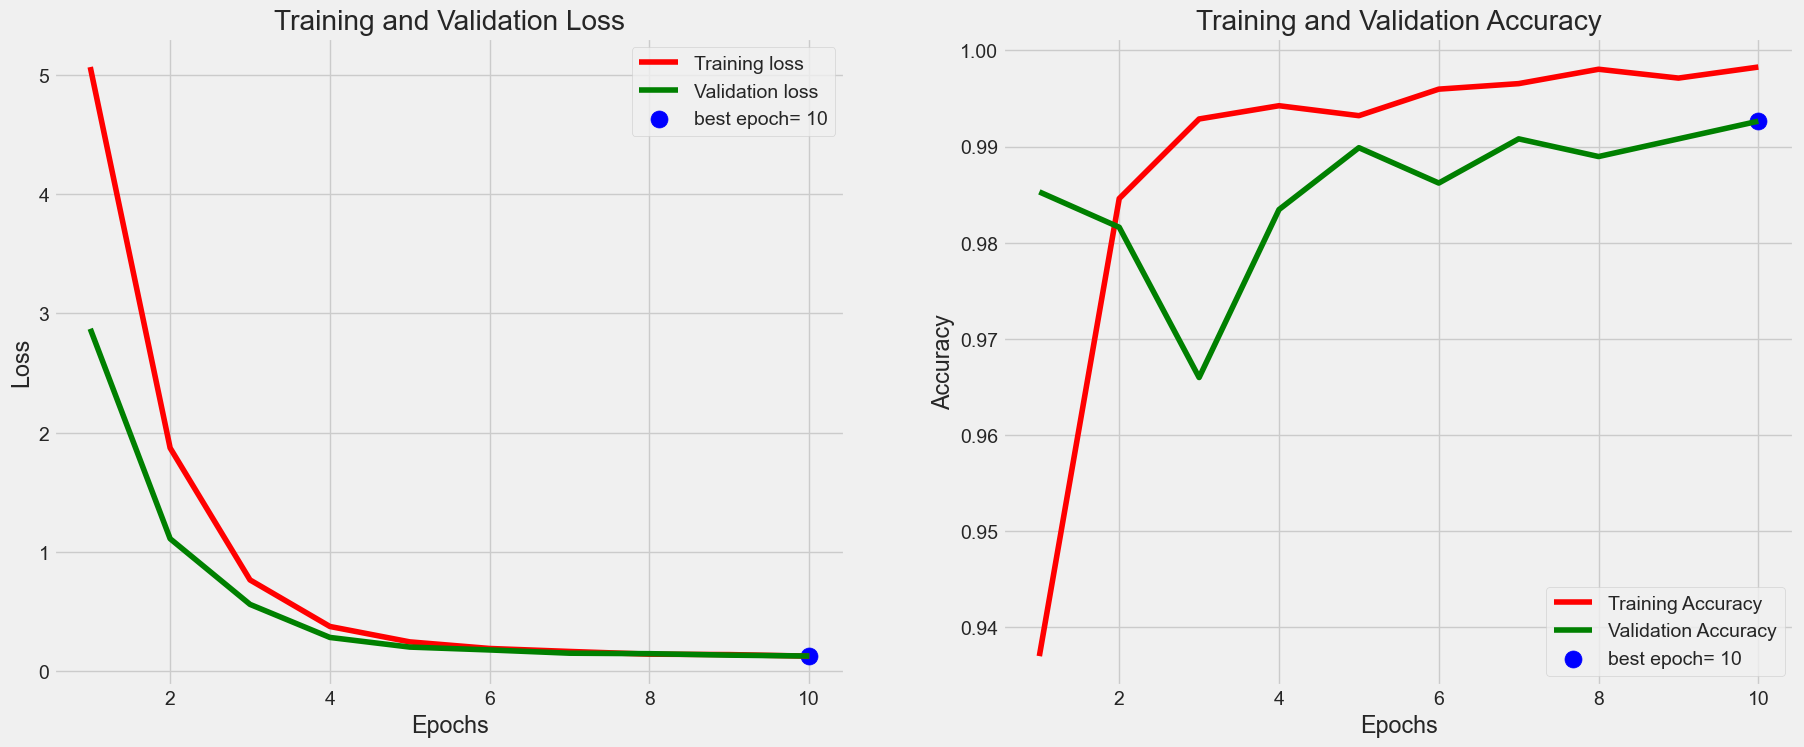

In [25]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss'] 
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate Pretrainedmodel

In [26]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

1087/1087 [==============================] - 65s 59ms/step - loss: 0.1334 - accuracy: 0.9890
Train Loss:  0.11687302589416504
Train Accuracy:  0.9943639039993286
--------------------
Validation Loss:  0.12918274104595184
Validation Accuracy:  0.9926403164863586
--------------------
Test Loss:  0.13338296115398407
Test Accuracy:  0.9889604449272156


<h2>Get Predictions<h2>

In [27]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

68/68 [==============================] - 72s 910ms/step


<h2>Confusion Matrics and Classification Report<h2>

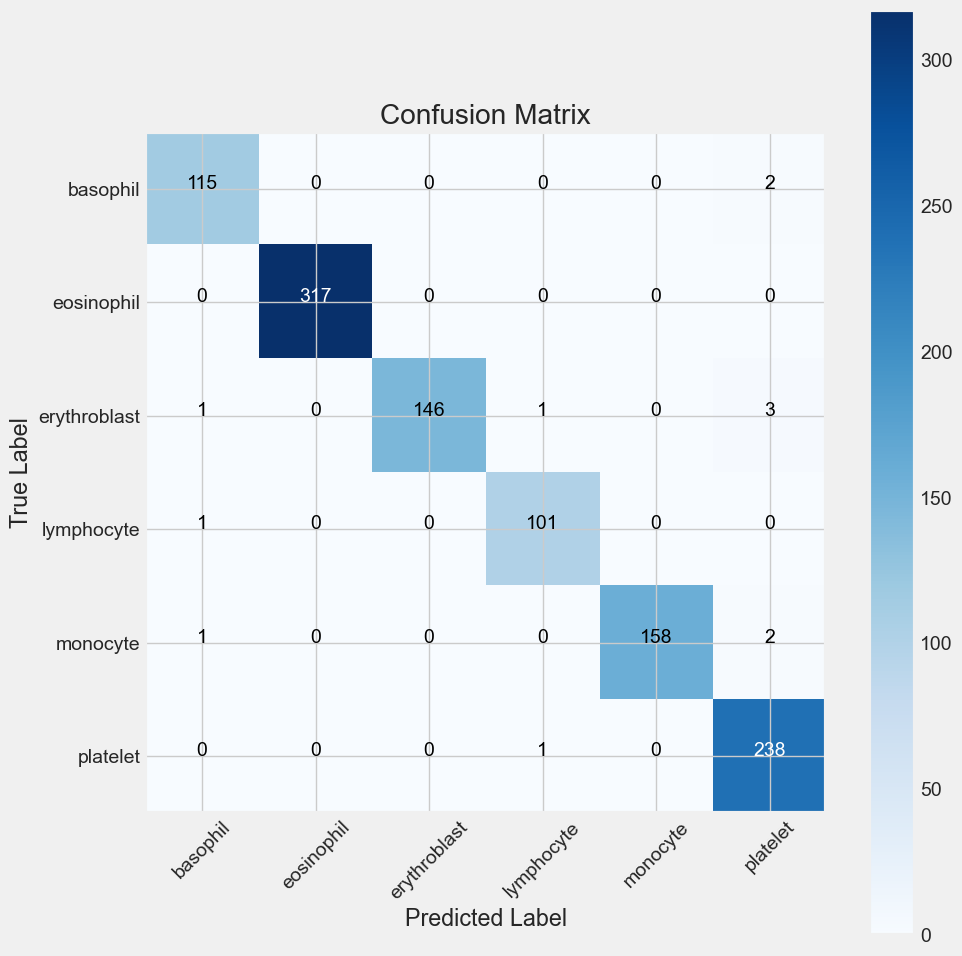

In [28]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [29]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

    basophil       0.97      0.98      0.98       117
  eosinophil       1.00      1.00      1.00       317
erythroblast       1.00      0.97      0.98       151
  lymphocyte       0.98      0.99      0.99       102
    monocyte       1.00      0.98      0.99       161
    platelet       0.97      1.00      0.98       239

    accuracy                           0.99      1087
   macro avg       0.99      0.99      0.99      1087
weighted avg       0.99      0.99      0.99      1087

